# Working with SQL Databases

## Written by Rizky Fadilah


In this report we will use the chinook.db database consists of 11 tables that contain sample data from a store that sells digital media:

Data related to media, as seen in tables such as tracks, albums, artists, genres, media_types, playlists, and playlist_track, are original data from the Apple iTunes library.
Information about customers and employees has been created using fictional names and addresses that can be found on Google Maps, along with other well-formatted data (phone numbers, fax, email, etc.).
Sales information in the invoices and invoice_items tables has been generated automatically using random data for the period from 2009 to 2013.

![](assets/chinookschema2.png)

We begin by importing essential libraries. sqlite3 enables interaction with SQLite databases, facilitating database operations, while pandas empowers data manipulation and analysis for efficient handling of database-retrieved data.

In [70]:
import sqlite3 # default package: Database API (DBAPI) / package
import pandas as pd

After importing the libraries, the next step is to establish a database connection.

In [71]:
conn = sqlite3.connect('data_input/chinook.db')

Next, we can perform an analysis using the data obtained from the database. For example, I will create a data frame that includes all sales (invoices) for the Rock genre in the year 2012. Then, we will proceed to analyze it.

## Analysis of all sales (invoices) for the Rock genre in the year 2012

In [72]:
rock_2012 = pd.read_sql_query(
'''
SELECT i.*, g.Name
From invoices as i
Left Join invoice_items as it
on i.InvoiceId = it.InvoiceId
Left join tracks as t
on t.TrackId = it.TrackId
left join genres as g
on g.GenreId = t.GenreId
where g.Name = 'Rock' and i.InvoiceDate LIKE '2012%'
''', conn
)

rock_2012

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,Name
0,250,55,2012-01-01 00:00:00,421 Bourke Street,Sidney,NSW,Australia,2010,13.86,Rock
1,250,55,2012-01-01 00:00:00,421 Bourke Street,Sidney,NSW,Australia,2010,13.86,Rock
2,250,55,2012-01-01 00:00:00,421 Bourke Street,Sidney,NSW,Australia,2010,13.86,Rock
3,250,55,2012-01-01 00:00:00,421 Bourke Street,Sidney,NSW,Australia,2010,13.86,Rock
4,250,55,2012-01-01 00:00:00,421 Bourke Street,Sidney,NSW,Australia,2010,13.86,Rock
...,...,...,...,...,...,...,...,...,...,...
159,327,1,2012-12-07 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,13.86,Rock
160,332,24,2012-12-30 00:00:00,162 E Superior Street,Chicago,IL,USA,60611,5.94,Rock
161,332,24,2012-12-30 00:00:00,162 E Superior Street,Chicago,IL,USA,60611,5.94,Rock
162,332,24,2012-12-30 00:00:00,162 E Superior Street,Chicago,IL,USA,60611,5.94,Rock


This code above retrieves and compiles data about sales invoices for the Rock genre in the year 2012 from a database using SQL queries. It creates a DataFrame named 'rock_2012' to store this information, including details about the invoices and the corresponding genre, facilitating further analysis and reporting.

Lets check the missing value :

In [73]:
missing_data = rock_2012.isnull().sum()
missing_data_message = "No missing values found in the DataFrame." if missing_data.sum() == 0 else "Missing values found in the DataFrame:\n" + str(missing_data)
print(missing_data_message)

Missing values found in the DataFrame:
InvoiceId             0
CustomerId            0
InvoiceDate           0
BillingAddress        0
BillingCity           0
BillingState         85
BillingCountry        0
BillingPostalCode    13
Total                 0
Name                  0
dtype: int64


We identified missing values in the 'BillingState' and 'BillingPostalCode' columns. Therefore these columns will not be a central to our analysis, we will choose not to exclude them.

Next we will check the duplicated data.

In [74]:
# Check for duplicate rows in the DataFrame

rock_2012.duplicated()

0      False
1       True
2       True
3       True
4       True
       ...  
159     True
160    False
161     True
162     True
163     True
Length: 164, dtype: bool

It seems that there is duplicate data in our dataframe. However, we will refrain from removing them, assuming that the data was originally duplicated due to a transaction occurring simultaneously.

1. Summary Statistics

In [75]:
total_mean = rock_2012['Total'].mean()
total_median = rock_2012['Total'].median()
total_std = rock_2012['Total'].std()

print(f"Mean Total: {total_mean}")
print(f"Median Total: {total_median}")
print(f"Standard Deviation of Total: {total_std}")

Mean Total: 9.366829268292694
Median Total: 8.91
Standard Deviation of Total: 5.227031058685544


2. Data Visualization

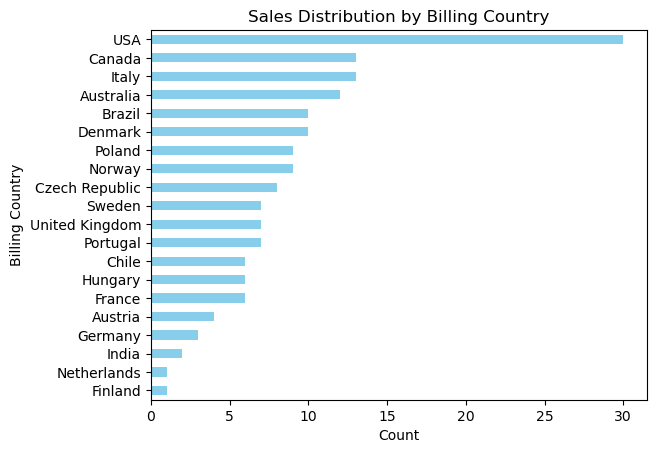

In [76]:
import matplotlib.pyplot as plt
country_counts = rock_2012['BillingCountry'].value_counts()

# Horizontal Bar Chart
country_counts.plot(kind='barh', color='skyblue')
plt.title('Sales Distribution by Billing Country')
plt.xlabel('Count')
plt.ylabel('Billing Country')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()

Insight: The plot illustrates the distribution of sales by billing country. The USA has the highest sales, while Findland has the lowest sales of rock genre in 2012.

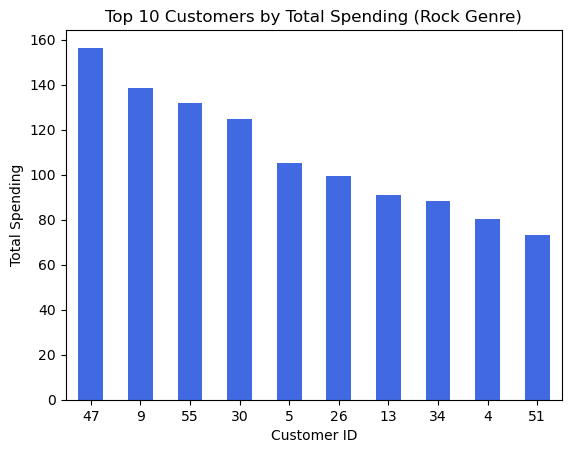

In [77]:
# Group by 'CustomerId' and calculate the sum of 'Total' spending, then sort it in descending order
customer_spending = rock_2012.groupby('CustomerId')['Total'].sum()
customer_spending = customer_spending.sort_values(ascending=False)

# Select the top 10 customers by total spending
top_10_customers = customer_spending.head(10)

# Create a bar chart for the top 10 customers
top_10_customers.plot(kind='bar', color='royalblue')
plt.title('Top 10 Customers by Total Spending (Rock Genre)')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


**Insight** : the top 10 customers in the Rock genre with their respective total spending, several insights can be drawn. Customer 47 is the highest spender, followed by customer 9 and customer 55, making them valuable targets for tailored promotions and loyalty programs. Analyzing the purchasing behavior of customer 30, customer 5, and customer 26 can help in retaining high-value customers. Furthermore, understanding the preferences of customers like customer 13, customer 34, and customer 4 can lead to strategies for customer retention and engagement. Overall, identifying and retaining high-value customers, providing personalized recommendations, and understanding their preferences are crucial to maximizing revenue in the Rock genre.

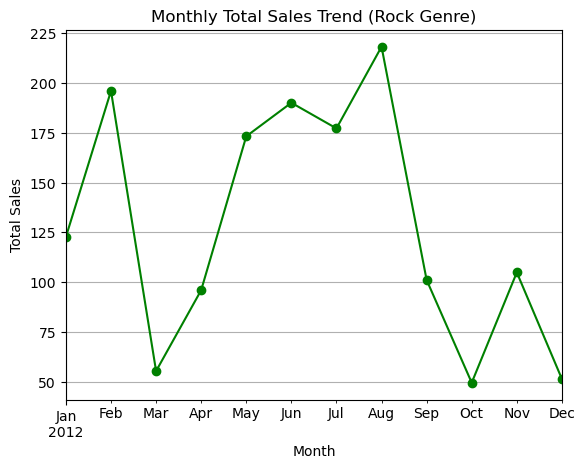

In [78]:
# Convert 'InvoiceDate' to a datetime column
rock_2012['InvoiceDate'] = pd.to_datetime(rock_2012['InvoiceDate'])

# Resample data to get monthly total sales
monthly_sales = rock_2012.resample('M', on='InvoiceDate')['Total'].sum()

# Create a line chart to visualize the monthly trend
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Total Sales Trend (Rock Genre)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


**Insight**

Monthly Sales Variability: The monthly total sales in the Rock genre exhibit notable variability throughout the year 2012. February and August stand out as months with the highest sales, with totals of $196.02 and $218.20, respectively.

Seasonal Patterns: While there are fluctuations in monthly sales, no clear, consistent seasonal pattern is evident. Some months, such as March and October, have lower sales totals, suggesting potential areas for improvement in marketing or promotions.

Year-End Spike: December, the year-end month, shows a sales total of $51.48, indicating that customers may have taken advantage of holiday offers or promotions.

Opportunities for Marketing: The insights from this monthly trend data can guide marketing and inventory management efforts. Identifying the factors contributing to peaks in February and August can inform strategies to boost sales during other months.


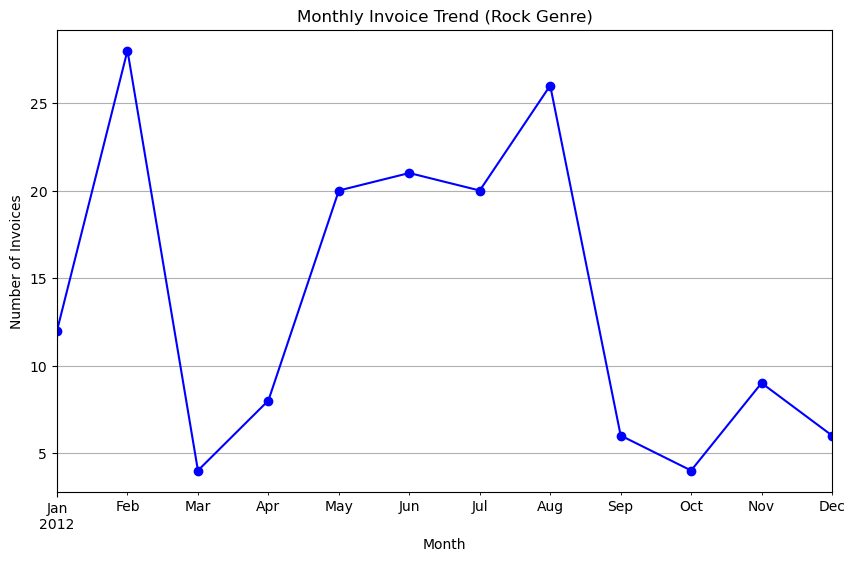

In [79]:
# Group by month and count the number of invoices
monthly_invoices = rock_2012.resample('M', on='InvoiceDate')['InvoiceId'].count()

# Create a line chart to visualize the monthly trend of invoice counts
monthly_invoices.plot(kind='line', marker='o', color='blue', figsize=(10, 6))
plt.title('Monthly Invoice Trend (Rock Genre)')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.grid(True)
plt.show()


This line chart displays the monthly trend in the number of invoices, helping to identify patterns or fluctuations in Rock genre sales over the course of the year.

**Insight**

February and August experienced the highest number of invoices, with 28 and 26 invoices, respectively.
Months with lower invoice counts, such as March, April, September, and October, indicate potential areas for improving sales or promotional efforts.
The data suggests variations in customer activity throughout the year, which could be associated with seasonal or marketing influences.

### Summary of all sales (invoices) for the Rock genre in the year 2012

Here's a summary of the insights from the data visualizations and analysis:

1. **Total Sales Statistics:**
   - Mean Total: 9.37
   - Median Total: 8.91
   - Standard Deviation of Total: 5.23
   - These statistics provide an overview of the distribution of total sales in the Rock genre.


2. **Sales by Billing Country:**
   - The USA has the highest sales, while Austria has the lowest sales of the Rock genre in 2012. This insight helps identify key markets for the genre.


3. **Top 10 Customers Analysis:**
   - The top 10 customers in the Rock genre show varying levels of spending.
   - Customer 47 is the highest spender, followed by customer 9 and customer 55. These high-value customers are valuable targets for tailored promotions.
   - Analyzing the preferences and behavior of other customers can lead to effective strategies for customer retention and engagement.


4. **Monthly Sales Trend:**
   - Monthly sales exhibit notable variability throughout the year. February and August had the highest sales.
   - No consistent seasonal pattern is observed, and months like March and October had lower sales, indicating areas for improvement in marketing or promotions.
   - December shows a year-end spike in sales.


5. **Monthly Invoice Trend:**
   - February and August had the highest number of invoices, with variations throughout the year.
   - The data suggests that customer activity varies monthly, indicating potential seasonal or marketing influences.

These insights provide valuable information for optimizing marketing strategies, identifying high-value customers, and understanding the trends in the Rock genre sales for the year 2012.